# Music Recommender System

**Author:** Rakhi  
**Date:** 15 August 2025  
**Description:**  
This project implements a music recommender system that suggests songs to users based on similarity in features such as artist, language_or_genre, and other metadata.  
The system uses content-based filtering to provide personalized song recommendations.


## Importing Required Libraries

In [923]:
# Pandas is used for data manipulation and analysis (works with data in table form)
import pandas as pd

# NumPy is used for numerical operations (fast mathematical functions, arrays, etc.)
import numpy as np

# Matplotlib is a basic library for creating visualizations and plots
import matplotlib.pyplot as plt
# Seaborn is a statistical data visualization library (built on top of Matplotlib)
import seaborn as sns

## Loading the Dataset

In [924]:
# Load the dataset from the specified local file path
df = pd.read_csv("C:\\Users\\rakhi\\Downloads\\new_music.csv")

In [925]:
# Display the first 5 rows of the dataset to inspect its structure and contents
df.head(5)

,song_name,artist,album,release_date,duration,explicit,popularity,rating,track_id,album_id,preview_url,youtube_link,year,language,region_or_genre,spotify_url,image_url
0,Ae Kash Ke Hum,Jatin-Lalit,Kabhi Haan Kabhi Naa (Original Motion Picture ...,1999-08-01,310426,False,69,NaN,1qyib2Wb5YTbNzZi7QMhEY,3bW1RcnpO5GNXNLo6qCgrh,NaN,NaN,1999,Hindi,Hindi,https://open.spotify.com/track/1qyib2Wb5YTbNzZ...,https://i.scdn.co/image/ab67616d0000b27340806c...
1,Chaaha Hai Tujhko,Udit Narayan,Mann (Original Motion Picture Soundtrack),1999-07-09,281000,False,67,NaN,7ynyU7I8T6aWEaKIOrKTxE,472NqagJRg2Z6sAgjkHY0t,NaN,NaN,1999,Hindi,Hindi,https://open.spotify.com/track/7ynyU7I8T6aWEaK...,https://i.scdn.co/image/ab67616d0000b2731455b7...
2,Pyar Ke Liye,Jatin-Lalit,Dil Kya Kare (Original Motion Picture Soundtrack),1999-06-26,305493,False,67,NaN,2oBSn18iPMom9cY5dDVwQZ,0Znd5F1rGGcrj6drlTmff1,NaN,NaN,1999,Hindi,Hindi,https://open.spotify.com/track/2oBSn18iPMom9cY...,https://i.scdn.co/image/ab67616d0000b273799464...
3,Hoshwalon Ko Khabar Kya,Jagjit Singh,Sarfarosh (Original Motion Picture Soundtrack),1999-04-30,307000,False,64,NaN,5NbR7c5zrOZN3Dje3JVJEN,55kjppMnPs20DEKXN7jaSF,NaN,NaN,1999,Hindi,Hindi,https://open.spotify.com/track/5NbR7c5zrOZN3Dj...,https://i.scdn.co/image/ab67616d0000b2736adbe3...
4,Main Koi Aisa Geet Gaoon,Abhijeet,Yes Boss (Original Motion Picture Soundtrack),1999-06-18,317000,False,63,NaN,0WBClBemYPJR44H6uIn0kp,4f0ooiboxVpTb7Y1jI5WH8,NaN,NaN,1999,Hindi,Hindi,https://open.spotify.com/track/0WBClBemYPJR44H...,https://i.scdn.co/image/ab67616d0000b2730f0e4b...


In [926]:
# Display the number of rows and columns in the dataset (rows, columns)
df.shape

(111742, 17)

In [927]:
# Get the list of all column names in the dataset and print them
columns_list = df.columns.tolist()
print(columns_list)

['song_name', 'artist', 'album', 'release_date', 'duration', 'explicit', 'popularity', 'rating', 'track_id', 'album_id', 'preview_url', 'youtube_link', 'year', 'language', 'region_or_genre', 'spotify_url', 'image_url']


In [928]:
# Count the occurrences of each unique value in the 'language' column
df['language'].value_counts()

language
Mixed      63965
Hindi      24873
English    13232
Punjabi     9672
Name: count, dtype: int64

##  Data Preprocessing

In [929]:
# Drop the specified columns from the dataset to keep only the relevant features for the model
# axis=1 indicates column-wise drop
# errors='ignore' ensures that no error is raised if a column is not found
df = df.drop(
    ["release_date", "duration", "explicit", "rating", "track_id", "album_id", "preview_url", "youtube_link", "language"],
    axis=1,
    errors='ignore'
)
# Display the first 5 rows of the updated dataset
df.head()

,song_name,artist,album,popularity,year,region_or_genre,spotify_url,image_url
0,Ae Kash Ke Hum,Jatin-Lalit,Kabhi Haan Kabhi Naa (Original Motion Picture ...,69,1999,Hindi,https://open.spotify.com/track/1qyib2Wb5YTbNzZ...,https://i.scdn.co/image/ab67616d0000b27340806c...
1,Chaaha Hai Tujhko,Udit Narayan,Mann (Original Motion Picture Soundtrack),67,1999,Hindi,https://open.spotify.com/track/7ynyU7I8T6aWEaK...,https://i.scdn.co/image/ab67616d0000b2731455b7...
2,Pyar Ke Liye,Jatin-Lalit,Dil Kya Kare (Original Motion Picture Soundtrack),67,1999,Hindi,https://open.spotify.com/track/2oBSn18iPMom9cY...,https://i.scdn.co/image/ab67616d0000b273799464...
3,Hoshwalon Ko Khabar Kya,Jagjit Singh,Sarfarosh (Original Motion Picture Soundtrack),64,1999,Hindi,https://open.spotify.com/track/5NbR7c5zrOZN3Dj...,https://i.scdn.co/image/ab67616d0000b2736adbe3...
4,Main Koi Aisa Geet Gaoon,Abhijeet,Yes Boss (Original Motion Picture Soundtrack),63,1999,Hindi,https://open.spotify.com/track/0WBClBemYPJR44H...,https://i.scdn.co/image/ab67616d0000b2730f0e4b...


In [930]:
# Check the new number of rows and columns in the dataset after dropping columns
df.shape

(111742, 8)

In [931]:
# Rename specific columns to match the updated naming convention
# 'region_or_genre' → 'language_or_genre'
# 'popularity' → 'rating'
df.rename(columns={
    "region_or_genre": "language_or_genre",
    "popularity": "rating"
}, inplace=True)
# Display the first 5 rows of the dataset after renaming columns
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
0,Ae Kash Ke Hum,Jatin-Lalit,Kabhi Haan Kabhi Naa (Original Motion Picture ...,69,1999,Hindi,https://open.spotify.com/track/1qyib2Wb5YTbNzZ...,https://i.scdn.co/image/ab67616d0000b27340806c...
1,Chaaha Hai Tujhko,Udit Narayan,Mann (Original Motion Picture Soundtrack),67,1999,Hindi,https://open.spotify.com/track/7ynyU7I8T6aWEaK...,https://i.scdn.co/image/ab67616d0000b2731455b7...
2,Pyar Ke Liye,Jatin-Lalit,Dil Kya Kare (Original Motion Picture Soundtrack),67,1999,Hindi,https://open.spotify.com/track/2oBSn18iPMom9cY...,https://i.scdn.co/image/ab67616d0000b273799464...
3,Hoshwalon Ko Khabar Kya,Jagjit Singh,Sarfarosh (Original Motion Picture Soundtrack),64,1999,Hindi,https://open.spotify.com/track/5NbR7c5zrOZN3Dj...,https://i.scdn.co/image/ab67616d0000b2736adbe3...
4,Main Koi Aisa Geet Gaoon,Abhijeet,Yes Boss (Original Motion Picture Soundtrack),63,1999,Hindi,https://open.spotify.com/track/0WBClBemYPJR44H...,https://i.scdn.co/image/ab67616d0000b2730f0e4b...


In [932]:
# Display concise summary of the dataset including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111742 entries, 0 to 111741
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   song_name          111742 non-null  object
 1   artist             111741 non-null  object
 2   album              111742 non-null  object
 3   rating             111742 non-null  int64 
 4   year               111742 non-null  int64 
 5   language_or_genre  111742 non-null  object
 6   spotify_url        111742 non-null  object
 7   image_url          111731 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.8+ MB


In [933]:
# Count the number of missing (NaN) values in the 'image_url' column
df['image_url'].isnull().sum()

11

In [934]:
# Remove all rows where the 'image_url' column has missing (NaN) values
df = df.dropna(subset=['image_url'])


In [935]:
# Check the dataset's dimensions (rows, columns) after removing rows with missing 'image_url' values
df.shape

(111731, 8)

In [936]:
# Display the dataset summary again to confirm changes after removing rows with missing 'image_url'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111731 entries, 0 to 111741
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   song_name          111731 non-null  object
 1   artist             111730 non-null  object
 2   album              111731 non-null  object
 3   rating             111731 non-null  int64 
 4   year               111731 non-null  int64 
 5   language_or_genre  111731 non-null  object
 6   spotify_url        111731 non-null  object
 7   image_url          111731 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.7+ MB


In [937]:
# Count the number of missing (NaN) values in each column of the dataset
df.isnull().sum()

song_name            0
artist               1
album                0
rating               0
year                 0
language_or_genre    0
spotify_url          0
image_url            0
dtype: int64

In [938]:
# Normalize the 'rating' column by dividing all values by 10 to bring them to a 0–10 range
df["rating"] = df["rating"]/10

In [939]:
# Display the first 5 rows of the dataset after filtering by rating range
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
0,Ae Kash Ke Hum,Jatin-Lalit,Kabhi Haan Kabhi Naa (Original Motion Picture ...,6.9,1999,Hindi,https://open.spotify.com/track/1qyib2Wb5YTbNzZ...,https://i.scdn.co/image/ab67616d0000b27340806c...
1,Chaaha Hai Tujhko,Udit Narayan,Mann (Original Motion Picture Soundtrack),6.7,1999,Hindi,https://open.spotify.com/track/7ynyU7I8T6aWEaK...,https://i.scdn.co/image/ab67616d0000b2731455b7...
2,Pyar Ke Liye,Jatin-Lalit,Dil Kya Kare (Original Motion Picture Soundtrack),6.7,1999,Hindi,https://open.spotify.com/track/2oBSn18iPMom9cY...,https://i.scdn.co/image/ab67616d0000b273799464...
3,Hoshwalon Ko Khabar Kya,Jagjit Singh,Sarfarosh (Original Motion Picture Soundtrack),6.4,1999,Hindi,https://open.spotify.com/track/5NbR7c5zrOZN3Dj...,https://i.scdn.co/image/ab67616d0000b2736adbe3...
4,Main Koi Aisa Geet Gaoon,Abhijeet,Yes Boss (Original Motion Picture Soundtrack),6.3,1999,Hindi,https://open.spotify.com/track/0WBClBemYPJR44H...,https://i.scdn.co/image/ab67616d0000b2730f0e4b...


In [940]:
df.tail(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
111737,Off Moody,Forest Wind Sounds,Rain & Rustle,0.0,2025,Rain,https://open.spotify.com/track/0TZcWCCoYmeCKp4...,https://i.scdn.co/image/ab67616d0000b273fe44e3...
111738,Peace Moody,Rainforest Music Therapy,Ethereal Atmosphere,0.0,2025,Rain,https://open.spotify.com/track/5lVteYmv5aZTGbU...,https://i.scdn.co/image/ab67616d0000b273b65ebd...
111739,Muted Moods,Nat Smitasiri,Rainy Jazz Escape | Lo-Fi Jazz for Rainy Days ...,0.0,2025,Rain,https://open.spotify.com/track/74961tmNsoRsVVH...,https://i.scdn.co/image/ab67616d0000b2734eff01...
111740,Save Mood,Rain Spa,Landscape of Beauty,0.0,2025,Rain,https://open.spotify.com/track/5GzydcB8rTpMHbA...,https://i.scdn.co/image/ab67616d0000b273ca3f20...
111741,Pensive Moods in Drizzle - Key Gb Ver.,Green Apple Jam,Rain-Soaked Afternoon Cafe with Jazz Accents,0.0,2025,Rain,https://open.spotify.com/track/4NET193LZ6YYWpe...,https://i.scdn.co/image/ab67616d0000b273990dd3...


In [941]:
# Find the minimum value in the 'rating' column
min_rating = df["rating"].min()
# Count how many songs have this minimum rating
count_min = (df["rating"] == min_rating).sum()
# Print the minimum rating value and its occurrence count
print("Minimum rating:", min_rating)
print("Count:", count_min)

Minimum rating: 0.0
Count: 20660


In [942]:
# Identify the minimum rating value in the dataset
min_val = df["rating"].min()
# Remove all rows where the 'rating' is equal to the minimum value
df.drop( df[df["rating"] == min_val].index,inplace=True)

In [943]:
# Display updated descriptive statistics after removing rows with the minimum rating
df.describe()

,rating,year
count,91071.000000,91071.000000
mean,2.554481,2013.744408
std,1.765527,7.617896
min,0.100000,1999.000000
25%,1.000000,2008.000000
50%,2.300000,2015.000000
75%,3.800000,2020.000000
max,9.400000,2025.000000


In [944]:
# Check the dataset's dimensions (rows, columns) after removing rows with the minimum rating
df.shape

(91071, 8)

In [945]:
df = df[(df['rating'] >= 3) & (df['rating'] <= 9)]

In [946]:
df.shape

(35925, 8)

In [947]:
# Lowercase transformation
df['song_name'] = df['song_name'].str.lower()
df['artist'] = df['artist'].str.lower()
df['album'] = df['album'].str.lower()
df['language_or_genre'] = df['language_or_genre'].str.lower()

In [948]:
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
0,ae kash ke hum,jatin-lalit,kabhi haan kabhi naa (original motion picture ...,6.9,1999,hindi,https://open.spotify.com/track/1qyib2Wb5YTbNzZ...,https://i.scdn.co/image/ab67616d0000b27340806c...
1,chaaha hai tujhko,udit narayan,mann (original motion picture soundtrack),6.7,1999,hindi,https://open.spotify.com/track/7ynyU7I8T6aWEaK...,https://i.scdn.co/image/ab67616d0000b2731455b7...
2,pyar ke liye,jatin-lalit,dil kya kare (original motion picture soundtrack),6.7,1999,hindi,https://open.spotify.com/track/2oBSn18iPMom9cY...,https://i.scdn.co/image/ab67616d0000b273799464...
3,hoshwalon ko khabar kya,jagjit singh,sarfarosh (original motion picture soundtrack),6.4,1999,hindi,https://open.spotify.com/track/5NbR7c5zrOZN3Dj...,https://i.scdn.co/image/ab67616d0000b2736adbe3...
4,main koi aisa geet gaoon,abhijeet,yes boss (original motion picture soundtrack),6.3,1999,hindi,https://open.spotify.com/track/0WBClBemYPJR44H...,https://i.scdn.co/image/ab67616d0000b2730f0e4b...


In [949]:
# Strip spaces and convert to string
df['song_name'] = df['song_name'].astype(str).str.strip()

# Keep only song names that start with an alphabet character
df = df[df['song_name'].str.match(r'^[A-Za-z]')].reset_index(drop=True)


In [950]:
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
0,ae kash ke hum,jatin-lalit,kabhi haan kabhi naa (original motion picture ...,6.9,1999,hindi,https://open.spotify.com/track/1qyib2Wb5YTbNzZ...,https://i.scdn.co/image/ab67616d0000b27340806c...
1,chaaha hai tujhko,udit narayan,mann (original motion picture soundtrack),6.7,1999,hindi,https://open.spotify.com/track/7ynyU7I8T6aWEaK...,https://i.scdn.co/image/ab67616d0000b2731455b7...
2,pyar ke liye,jatin-lalit,dil kya kare (original motion picture soundtrack),6.7,1999,hindi,https://open.spotify.com/track/2oBSn18iPMom9cY...,https://i.scdn.co/image/ab67616d0000b273799464...
3,hoshwalon ko khabar kya,jagjit singh,sarfarosh (original motion picture soundtrack),6.4,1999,hindi,https://open.spotify.com/track/5NbR7c5zrOZN3Dj...,https://i.scdn.co/image/ab67616d0000b2736adbe3...
4,main koi aisa geet gaoon,abhijeet,yes boss (original motion picture soundtrack),6.3,1999,hindi,https://open.spotify.com/track/0WBClBemYPJR44H...,https://i.scdn.co/image/ab67616d0000b2730f0e4b...


In [951]:
df.shape

(35173, 8)

In [952]:
import re
# Function to normalize song names by removing extra text and formatting them
def normalize_song_name(name):
    name = name.lower()  # Convert song name to lowercase
    # Remove any text inside parentheses
    name = re.sub(r'\(.*?\)', '', name)
    # Remove any text after a dash (-)
    name = re.sub(r'-.*', '', name)
    
    # Remove leading and trailing spaces
    name = name.strip()
    return name

# Apply the normalization function to the 'song_name' column
df['song_name'] = df['song_name'].apply(normalize_song_name)

In [953]:
# Count the number of duplicate entries based on the 'song_name' column
duplicate_song_names_count = df.duplicated(subset=['song_name']).sum()
# Print the total number of duplicate song names found in the dataset
print("Total duplicate song names:", duplicate_song_names_count)

Total duplicate song names: 7930


In [954]:
# Count how many times each song name appears in the dataset
song_counts = df['song_name'].value_counts()
# Filter out only those song names that appear more than once (duplicates)
duplicates = song_counts[song_counts > 1]
# Print the list of duplicate song names along with their occurrence counts
print(duplicates)

song_name
slow motion               82
party                     80
summertime sadness        44
house party               30
englishman in new york    29
                          ..
saans                      2
das leben ist ne party     2
blooming dales             2
wada karo                  2
never again                2
Name: count, Length: 4304, dtype: int64


In [955]:
# Remove duplicate rows based on 'song_name' and keep only the first occurrence
df = df.drop_duplicates(subset=['song_name']).reset_index(drop=True)

In [956]:
df.shape

(27243, 8)

In [957]:
# Count the frequency of each unique value in the 'language_or_genre' column
df['language_or_genre'].value_counts()


language_or_genre
sad                 5593
hindi               5102
romantic            4145
party               3220
lofi                3048
english             2833
religious/bhakti    1589
punjabi             1416
rain                 159
slow motion          138
Name: count, dtype: int64

In [958]:
# Generate descriptive statistics for numeric columns (count, mean, std, min, max, quartiles)
df.describe()

,rating,year
count,27243.000000,27243.000000
mean,4.410245,2016.407187
std,1.086779,7.145981
min,3.000000,1999.000000
25%,3.500000,2012.000000
50%,4.200000,2018.000000
75%,5.100000,2022.000000
max,9.000000,2025.000000


In [959]:
# Sort the dataset alphabetically by 'song_name' in ascending order
# Reset the index after sorting and drop the old index
df= df.sort_values(by='song_name', ascending=True).reset_index(drop=True)
# Display the first 5 rows of the sorted dataset
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
0,a,simone sommerland,die 30 besten partylieder für kinder,3.5,2012,party,https://open.spotify.com/track/5s6AiTR7hKJYMXT...,https://i.scdn.co/image/ab67616d0000b27312ba65...
1,a 700 km,shé,a 700 km (con elena),5.5,2006,romantic,https://open.spotify.com/track/74dPjpQpOVmLbY3...,https://i.scdn.co/image/ab67616d0000b2731ef3a5...
2,a b c d e f g h i love you,hari haran,hum saath - saath hain (original motion pictur...,4.2,1999,hindi,https://open.spotify.com/track/6bqIRqzCCAv0woc...,https://i.scdn.co/image/ab67616d0000b27339f6c9...
3,a bangla party,bilal shahid,a bangla party,3.0,2025,party,https://open.spotify.com/track/3Dy0GGaPBlhKfP5...,https://i.scdn.co/image/ab67616d0000b273a177f8...
4,a beat to chill to,mi ka,"the jazz hop conspiracy, vol. 1",3.7,2017,lofi,https://open.spotify.com/track/51dPgm96cBeY9jh...,https://i.scdn.co/image/ab67616d0000b273f1e2af...


In [960]:
# Filter the dataset to keep only songs released between the years 2010 and 2025 (inclusive)
# Reset the index after filtering
df = df[(df['year'] >= 2010) & (df['year'] <= 2025)].reset_index(drop=True)
# Print the total number of rows remaining after filtering by year
print("Filtered rows count:", len(df))


Filtered rows count: 21981


In [961]:
df.shape

(21981, 8)

In [962]:
# Remove rows that contain any of the specified genres/languages in 'language_or_genre'
remove_list = ['English', 'Party', 'Punjabi', 'Sad','Romantic','Lofi']
# Keep only those rows where 'language_or_genre' does NOT match any item in remove_list (case-insensitive)
df = df[~df['language_or_genre'].str.contains('|'.join(remove_list), case=False, na=False)].reset_index(drop=True)
# Print the number of rows remaining after removal
print("Rows after removal:", len(df))
# Display the frequency count of each remaining genre/language
print(df['language_or_genre'].value_counts())


Rows after removal: 5481
language_or_genre
hindi               4091
religious/bhakti    1115
rain                 158
slow motion          117
Name: count, dtype: int64


In [963]:
# Check the dataset's dimensions (rows, columns) after removing songs starting with special characters
df.shape

(5481, 8)

In [964]:
# Display the first 5 rows of the final cleaned and processed dataset
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
0,a flying jatt,tanishkaa,a flying jatt (original motion picture soundtr...,5.0,2016,hindi,https://open.spotify.com/track/4LcpHXVFU5IfXB4...,https://i.scdn.co/image/ab67616d0000b2738808ea...
1,a life full of love theme,anirudh ravichander,3 (original motion picture soundtrack),4.7,2011,hindi,https://open.spotify.com/track/5o0cR4FzBPvSE78...,https://i.scdn.co/image/ab67616d0000b2730d6693...
2,a moonlight path,martin czerny,piano + rain,3.0,2020,rain,https://open.spotify.com/track/47Sx95pXWW6iEuk...,https://i.scdn.co/image/ab67616d0000b273d14909...
3,a voice in my head and rainy,martin czerny,sad piano & cello rainy mood viii,3.9,2021,rain,https://open.spotify.com/track/4odjnu3I8aQyYmw...,https://i.scdn.co/image/ab67616d0000b27373536e...
4,aa bhi ja mere mehermaan,atif aslam,jayantabhai ki luv story (original motion pict...,3.6,2012,hindi,https://open.spotify.com/track/4wtqAewbRjuO3Ut...,https://i.scdn.co/image/ab67616d0000b27361b4be...


In [965]:
# Display the dataset's dimensions (rows, columns)
print(df.shape)

# Display the data types of each column
print(df.dtypes)

# Count the number of missing values in each column
print(df.isnull().sum())


(5481, 8)
song_name             object
artist                object
album                 object
rating               float64
year                   int64
language_or_genre     object
spotify_url           object
image_url             object
dtype: object
song_name            0
artist               0
album                0
rating               0
year                 0
language_or_genre    0
spotify_url          0
image_url            0
dtype: int64


In [966]:
# Display descriptive statistics for numeric columns in the final dataset
print(df.describe()) 

            rating         year
count  5481.000000  5481.000000
mean      4.646470  2018.921547
std       1.135352     4.329037
min       3.000000  2010.000000
25%       3.800000  2016.000000
50%       4.500000  2020.000000
75%       5.400000  2023.000000
max       8.600000  2025.000000


In [967]:
# Count the occurrences of each unique value in the 'language_or_genre' column
print(df['language_or_genre'].value_counts())

language_or_genre
hindi               4091
religious/bhakti    1115
rain                 158
slow motion          117
Name: count, dtype: int64


In [968]:
# Count the total number of duplicate rows in the dataset
print(df.duplicated().sum())


0


In [969]:
# Count the occurrences of each unique artist (case-insensitive) in the dataset
artist_count=(df['artist'].str.lower().value_counts()) 	

In [970]:
# Display the top 10 most frequent artists in the dataset
print(artist_count.head(10))

artist
pritam                 200
anirudh ravichander    122
a.r. rahman            107
arijit singh            95
vishal-shekhar          72
amit trivedi            68
slumberjacks            65
sachin-jigar            60
hansraj raghuwanshi     54
jubin nautiyal          52
Name: count, dtype: int64


In [971]:
# Display the 10 least frequent artists in the dataset
print(artist_count.tail(10))

artist
kitty kallen                      1
meenakshi paanchaal               1
sandaru sathsara                  1
shrinkhal                         1
peter cat recording co. (pcrc)    1
rauhan malik                      1
sonam chaudhary                   1
ashutosh pratihast                1
vrinda shri                       1
usha mangeshkar                   1
Name: count, dtype: int64


In [972]:
# Count the number of songs for each artist
artist_counts = df['artist'].value_counts()

# Identify artists who do NOT have exactly 2 songs
artists_to_keep = artist_counts[artist_counts != 2].index

# Keep only rows corresponding to those artists
df = df[df['artist'].isin(artists_to_keep)].reset_index(drop=True)

# Print the number of rows after filtering
print("Original rows:", len(df))
print("Rows after removing artists with exactly 2 songs:")


Original rows: 5021
Rows after removing artists with exactly 2 songs:


In [973]:
# Check the dataset's dimensions (rows, columns) after removing artists with exactly 2 songs
df.shape

(5021, 8)

In [974]:
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
0,a flying jatt,tanishkaa,a flying jatt (original motion picture soundtr...,5.0,2016,hindi,https://open.spotify.com/track/4LcpHXVFU5IfXB4...,https://i.scdn.co/image/ab67616d0000b2738808ea...
1,a life full of love theme,anirudh ravichander,3 (original motion picture soundtrack),4.7,2011,hindi,https://open.spotify.com/track/5o0cR4FzBPvSE78...,https://i.scdn.co/image/ab67616d0000b2730d6693...
2,a moonlight path,martin czerny,piano + rain,3.0,2020,rain,https://open.spotify.com/track/47Sx95pXWW6iEuk...,https://i.scdn.co/image/ab67616d0000b273d14909...
3,a voice in my head and rainy,martin czerny,sad piano & cello rainy mood viii,3.9,2021,rain,https://open.spotify.com/track/4odjnu3I8aQyYmw...,https://i.scdn.co/image/ab67616d0000b27373536e...
4,aa bhi ja mere mehermaan,atif aslam,jayantabhai ki luv story (original motion pict...,3.6,2012,hindi,https://open.spotify.com/track/4wtqAewbRjuO3Ut...,https://i.scdn.co/image/ab67616d0000b27361b4be...


## Exploratory Data Analysis (EDA)

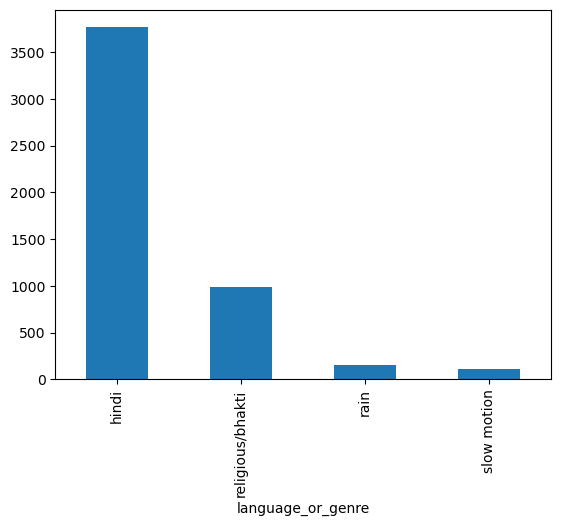

In [975]:
# Plot a bar chart showing the distribution of songs by 'language_or_genre'
df['language_or_genre'].value_counts().plot(kind='bar')

# Display the plot
plt.show()

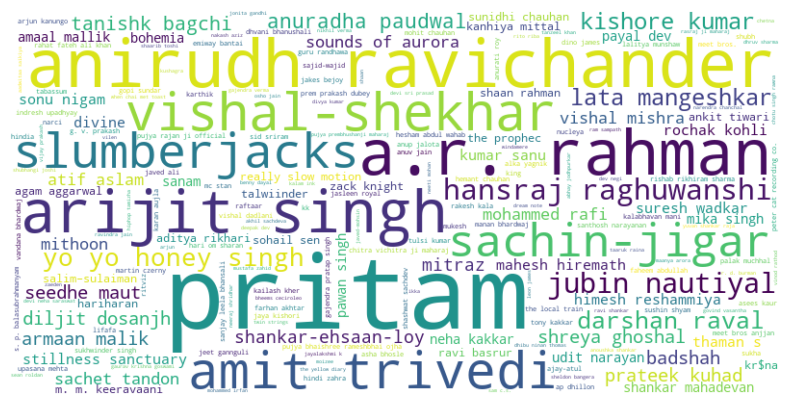

In [976]:
# Generate a Word Cloud to visualize the distribution of songs across artists
from wordcloud import WordCloud
# Create the WordCloud object using artist frequencies
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(artist_count)
# Set figure size and display the Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

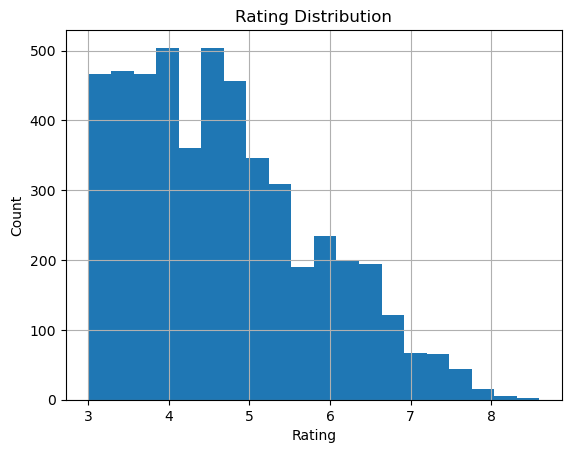

In [977]:
# Plot a histogram to show the frequency distribution of songs across different rating values
df['rating'].hist(bins=20)

# Add title and axis labels
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Display the histogram
plt.show()


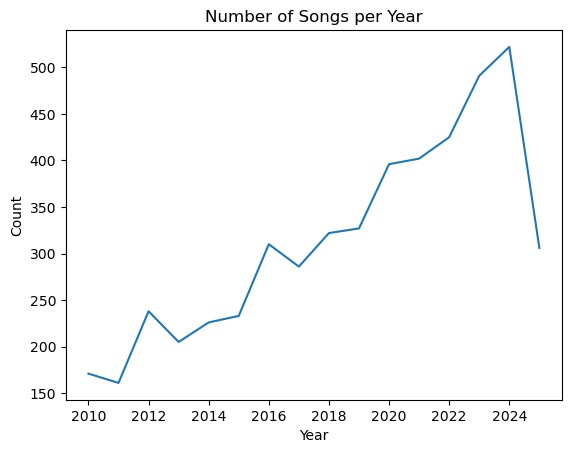

In [978]:
# Plot a line chart showing the number of songs released each year
df['year'].value_counts().sort_index().plot(kind='line')

# Add title and axis labels
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()


In [979]:
# Calculate and display the correlation matrix between 'rating' and 'year'
print(df[['rating', 'year']].corr())


          rating      year
rating  1.000000  0.041718
year    0.041718  1.000000


Number of unique ratings: 56


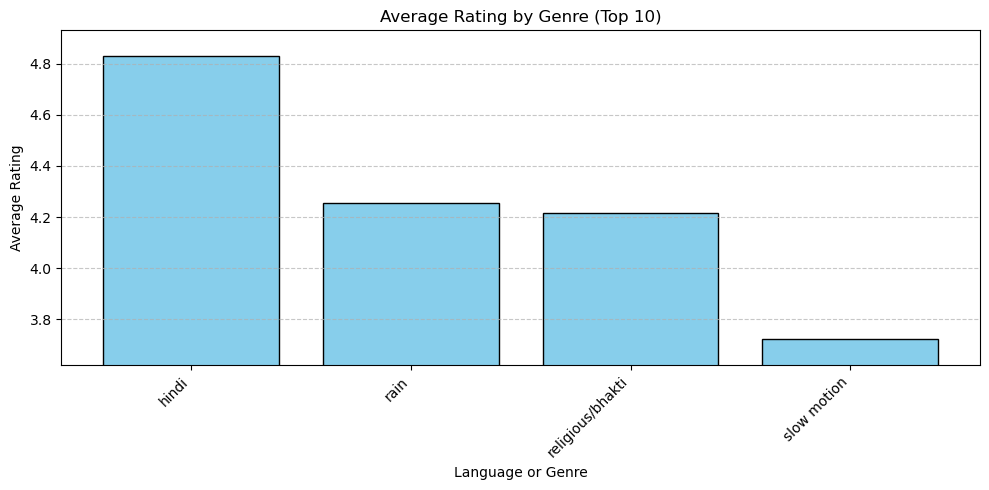

In [980]:
# Count the frequency of each unique rating and display the number of unique ratings
rating_counts = df['rating'].value_counts().sort_index()
print("Number of unique ratings:", len(rating_counts))

# Calculate the average rating for each language/genre and get the top 10
avg_rating_by_genre = df.groupby('language_or_genre')['rating'].mean().sort_values(ascending=False).head(10)

# Plot a bar chart for the top 10 genres with highest average ratings
plt.figure(figsize=(10, 5))
plt.bar(avg_rating_by_genre.index, avg_rating_by_genre.values, color='skyblue', edgecolor='black')
plt.title("Average Rating by Genre (Top 10)")
plt.xlabel("Language or Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(avg_rating_by_genre.min() - 0.1, avg_rating_by_genre.max() + 0.1)
plt.tight_layout()
plt.show()


In [981]:
# Check the dataset's dimensions (rows, columns) after all cleaning and filtering steps
df.shape

(5021, 8)

In [982]:
# Display the first 5 rows of the final cleaned and processed dataset
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url
0,a flying jatt,tanishkaa,a flying jatt (original motion picture soundtr...,5.0,2016,hindi,https://open.spotify.com/track/4LcpHXVFU5IfXB4...,https://i.scdn.co/image/ab67616d0000b2738808ea...
1,a life full of love theme,anirudh ravichander,3 (original motion picture soundtrack),4.7,2011,hindi,https://open.spotify.com/track/5o0cR4FzBPvSE78...,https://i.scdn.co/image/ab67616d0000b2730d6693...
2,a moonlight path,martin czerny,piano + rain,3.0,2020,rain,https://open.spotify.com/track/47Sx95pXWW6iEuk...,https://i.scdn.co/image/ab67616d0000b273d14909...
3,a voice in my head and rainy,martin czerny,sad piano & cello rainy mood viii,3.9,2021,rain,https://open.spotify.com/track/4odjnu3I8aQyYmw...,https://i.scdn.co/image/ab67616d0000b27373536e...
4,aa bhi ja mere mehermaan,atif aslam,jayantabhai ki luv story (original motion pict...,3.6,2012,hindi,https://open.spotify.com/track/4wtqAewbRjuO3Ut...,https://i.scdn.co/image/ab67616d0000b27361b4be...


## Feature Engineering

In [983]:
# Create a new column 'metadata' by combining 'artist', 'album', and 'language_or_genre'
df['metadata'] = df['artist'] + ' ' + df['album'] + ' ' + df['language_or_genre']

# Check the dataset's dimensions after adding the 'metadata' column
df.shape


(5021, 9)

In [984]:
df.head(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url,metadata
0,a flying jatt,tanishkaa,a flying jatt (original motion picture soundtr...,5.0,2016,hindi,https://open.spotify.com/track/4LcpHXVFU5IfXB4...,https://i.scdn.co/image/ab67616d0000b2738808ea...,tanishkaa a flying jatt (original motion pictu...
1,a life full of love theme,anirudh ravichander,3 (original motion picture soundtrack),4.7,2011,hindi,https://open.spotify.com/track/5o0cR4FzBPvSE78...,https://i.scdn.co/image/ab67616d0000b2730d6693...,anirudh ravichander 3 (original motion picture...
2,a moonlight path,martin czerny,piano + rain,3.0,2020,rain,https://open.spotify.com/track/47Sx95pXWW6iEuk...,https://i.scdn.co/image/ab67616d0000b273d14909...,martin czerny piano + rain rain
3,a voice in my head and rainy,martin czerny,sad piano & cello rainy mood viii,3.9,2021,rain,https://open.spotify.com/track/4odjnu3I8aQyYmw...,https://i.scdn.co/image/ab67616d0000b27373536e...,martin czerny sad piano & cello rainy mood vii...
4,aa bhi ja mere mehermaan,atif aslam,jayantabhai ki luv story (original motion pict...,3.6,2012,hindi,https://open.spotify.com/track/4wtqAewbRjuO3Ut...,https://i.scdn.co/image/ab67616d0000b27361b4be...,atif aslam jayantabhai ki luv story (original ...


In [985]:
df.tail(5)

,song_name,artist,album,rating,year,language_or_genre,spotify_url,image_url,metadata
5016,zindagi se,shafaqat ali,raaz 3,5.7,2012,hindi,https://open.spotify.com/track/3leLzzwwZEaJYGO...,https://i.scdn.co/image/ab67616d0000b273e108cd...,shafaqat ali raaz 3 hindi
5017,zingaat,ajay-atul,dhadak (original motion picture soundtrack),6.4,2018,hindi,https://open.spotify.com/track/6rDCSTANJ05fi9n...,https://i.scdn.co/image/ab67616d0000b273757a24...,ajay-atul dhadak (original motion picture soun...
5018,zohra jabeen,pritam,sikandar (original motion picture soundtrack),3.7,2025,hindi,https://open.spotify.com/track/7qJ4BwRBROvYJTF...,https://i.scdn.co/image/ab67616d0000b2730a5981...,pritam sikandar (original motion picture sound...
5019,zor lagaake haishaa,vishal dadlani,yaariyan,3.2,2013,hindi,https://open.spotify.com/track/1y9QH9IWOfV7m3I...,https://i.scdn.co/image/ab67616d0000b273a51f57...,vishal dadlani yaariyan hindi
5020,zul zul vaahe,usha mangeshkar,ganpati 2022 special,3.9,2022,religious/bhakti,https://open.spotify.com/track/1VxQyHj52pSJxAs...,https://i.scdn.co/image/ab67616d0000b273395f7b...,usha mangeshkar ganpati 2022 special religious...


##  Building the Recommendation Engine

In [986]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer to convert text data into numerical features
# Stop words in English are removed
tfidf = TfidfVectorizer(stop_words='english')
# Fit the vectorizer on the 'metadata' column and transform it into a TF-IDF feature matrix
tfidf_matrix = tfidf.fit_transform(df['metadata'])


In [987]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine similarity matrix between all songs based on their TF-IDF features
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [988]:
# Create a mapping from song titles to their dataframe indices for quick lookup
indices = pd.Series(df.index, index=df['song_name']).drop_duplicates()

# Define a content-based song recommendation function
def recommend(song_name, cosine_sim=cosine_sim, n_recommendations=5):
    # Convert input song name to lowercase for consistency
    song_name = song_name.lower()

     # Check if the song exists in the dataset
    if song_name not in indices:
        return f"Song '{song_name}' not found in dataset."

    # Get the index of the input song
    idx = indices[song_name]
    
    # Compute similarity scores with all other songs
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort songs based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Take top N recommendations (excluding the song itself)
    sim_scores = sim_scores[1:n_recommendations+1]
    song_indices = [i[0] for i in sim_scores]

    # Return the recommended songs with relevant details
    return df.iloc[song_indices][['song_name', 'artist', 'album', 'rating', 'spotify_url']]


In [989]:
# Test the recommendation function by getting similar songs to 'tum hi ho'
recommend('tum hi ho')


,song_name,artist,album,rating,spotify_url
4669,tum hi ho,mithoon,aashiqui 2,8.0,https://open.spotify.com/track/56zZ48jdyY2oDXH...
103,aashiqui aa gayi,mithoon,"aashiqui aa gayi (from ""radhe shyam"")",5.2,https://open.spotify.com/track/7I6mwEFQwpTu5ci...
98,aasan nahin yahan,arijit singh,aashiqui 2,7.3,https://open.spotify.com/track/06zJUeKU5KFy50C...
2861,milne hai mujhse aayi,arijit singh,aashiqui 2,7.1,https://open.spotify.com/track/2iGnFW7m517taq3...
3814,sanam re,mithoon,sanam re,6.9,https://open.spotify.com/track/0CVfovmUv7BnemO...


##  Model Evaluation

In [990]:
# Function to generate a similarity matrix for a given song and its top N recommendations
def get_similarity_matrix_for_recommendations(song_name, cosine_sim=cosine_sim, n_recommendations=5):
    # Convert input song name to lowercase
    song_name = song_name.lower()
    
    # Check if the song exists in the dataset
    if song_name not in indices:
        return f"Song '{song_name}' not found in dataset."
        
    # Get the index of the input song
    idx = indices[song_name]
    
    # Compute similarity scores with all other songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort songs based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Take top N+1 songs (including the input song)
    sim_scores = sim_scores[0:n_recommendations+1]

    # Extract indices of the selected songs
    song_indices = [i[0] for i in sim_scores]

    # Create a similarity matrix for these songs
    sim_matrix = cosine_sim[np.ix_(song_indices, song_indices)]

    # Prepare labels for rows and columns using song names
    labels = [df['song_name'].iloc[i] for i in song_indices]

    # Return the similarity matrix as a pandas DataFrame
    return pd.DataFrame(sim_matrix, index=labels, columns=labels)


In [991]:
# Generate a cosine similarity matrix for 'tum hi ho' and its top 5 recommended songs
get_similarity_matrix_for_recommendations('tum hi ho', n_recommendations=5)

,aashiqui,tum hi ho,aashiqui aa gayi,aasan nahin yahan,milne hai mujhse aayi,sanam re
aashiqui,1.000000,1.000000,0.580265,0.551848,0.551848,0.493038
tum hi ho,1.000000,1.000000,0.580265,0.551848,0.551848,0.493038
aashiqui aa gayi,0.580265,0.580265,1.000000,0.320218,0.320218,0.286092
aasan nahin yahan,0.551848,0.551848,0.320218,1.000000,1.000000,0.019985
milne hai mujhse aayi,0.551848,0.551848,0.320218,1.000000,1.000000,0.019985
sanam re,0.493038,0.493038,0.286092,0.019985,0.019985,1.000000


In [992]:
# Function to calculate Precision@K for a recommendation system
# recommended_df: DataFrame returned by recommend() with column 'song_name'
# relevant_songs: List of ground truth relevant songs for the input
# k: number of top recommendations to consider
def precision_at_k(recommended_df, relevant_songs, k=5):
    # Take top K recommended songs
    recommended_songs = recommended_df['song_name'].tolist()[:k]

    # Convert relevant songs to a set for faster lookup
    relevant_set = set(relevant_songs)

    # Count how many recommended songs are actually relevant
    relevant_in_rec = [song for song in recommended_songs if song in relevant_set]

    # Calculate precision
    precision = len(relevant_in_rec) / k
    
    return precision

# Example usage:

# Input song
input_song = 'tum hi ho'

# Relevant songs (ground truth) from user preference or labeled data
relevant_songs_example = ['aashiqui', 'aasan nahin yahan', 'tum hi ho', 'milne hai mujhse aayi','sunn raha hai']

# Get top 5 recommendations for the input song
recommended_df = recommend(input_song, n_recommendations=5)

# Calculate Precision@5
prec = precision_at_k(recommended_df, relevant_songs_example, k=5)
print(f"Precision@5 for '{input_song}': {prec * 100:.2f}%")


Precision@5 for 'tum hi ho': 60.00%


## Testing the Model

In [1002]:
recommend('sapne re')

,song_name,artist,album,rating,spotify_url
2564,main kaun hoon,amit trivedi,secret superstar (original motion picture soun...,4.4,https://open.spotify.com/track/4XfzBRX6uoBbskH...
2993,nachdi phira,amit trivedi,secret superstar (original motion picture soun...,5.0,https://open.spotify.com/track/1FDzmtZupvFBYxU...
3163,o re manwa,amit trivedi,secret superstar (original motion picture soun...,3.7,https://open.spotify.com/track/0bgNYRYlYbW5kje...
3835,sapne re,amit trivedi,secret superstar (original motion picture soun...,4.8,https://open.spotify.com/track/2dUMzjTHFezbCEk...
927,daryaa,amit trivedi,manmarziyaan (original motion picture soundtrack),6.3,https://open.spotify.com/track/5WJ7hrAsgcfncN8...


In [993]:
recommend('ilahi')

,song_name,artist,album,rating,spotify_url
1098,dilliwaali girlfriend,pritam,yeh jawaani hai deewani,6.9,https://open.spotify.com/track/3W1XPf7mvuQcWQB...
1756,ilahi,pritam,yeh jawaani hai deewani,7.5,https://open.spotify.com/track/5cgKosPPj5Cs9a2...
2056,kabira,pritam,yeh jawaani hai deewani,6.3,https://open.spotify.com/track/3jJ5HgLRNydtLRg...
4211,subhanallah,pritam,yeh jawaani hai deewani,7.5,https://open.spotify.com/track/0GQngE2rOYvlKwE...
4952,yeh jawaani hai deewani mashup,benny dayal,yeh jawaani hai deewani mashup,4.1,https://open.spotify.com/track/53B0ulrdBkRWe4X...


In [994]:
# Generate a cosine similarity matrix for 'ilahi' and its top 5 recommended songs
get_similarity_matrix_for_recommendations('ilahi', n_recommendations=5)

,badtameez dil,dilliwaali girlfriend,ilahi,kabira,subhanallah,yeh jawaani hai deewani mashup
badtameez dil,1.000000,1.000000,1.000000,1.000000,1.000000,0.701094
dilliwaali girlfriend,1.000000,1.000000,1.000000,1.000000,1.000000,0.701094
ilahi,1.000000,1.000000,1.000000,1.000000,1.000000,0.701094
kabira,1.000000,1.000000,1.000000,1.000000,1.000000,0.701094
subhanallah,1.000000,1.000000,1.000000,1.000000,1.000000,0.701094
yeh jawaani hai deewani mashup,0.701094,0.701094,0.701094,0.701094,0.701094,1.000000


In [995]:
# Input song for evaluation
input_song = 'ilahi'

# Relevant songs (ground truth) from user preference or labeled data
relevant_songs_example = ['badtameez dil','dilliwaali girlfriend','kabira','subhanallah','ghagra','balam pichkari']

# Get top 5 recommendations for the input song
recommended_df = recommend(input_song, n_recommendations=5)

# Calculate Precision@5 for the recommendations
prec = precision_at_k(recommended_df, relevant_songs_example, k=5)

# Print the Precision@5 value
print(f"Precision@5 for '{input_song}': {prec * 100:.2f}%")

Precision@5 for 'ilahi': 60.00%


In [996]:
# Test the recommendation function for the song 'kanha mere kanha'
recommend('kanha mere kanha')

,song_name,artist,album,rating,spotify_url
2123,kanha kanha,manndakini bora,kanha kanha,3.1,https://open.spotify.com/track/4b10KTdoAf3r63z...
2799,mere kanha,jaya kishori,mere kanha,5.4,https://open.spotify.com/track/6ZTso47mJa9a4Gp...
2800,mere kanha bhool na jaana,jubin nautiyal,mere kanha bhool na jaana,4.6,https://open.spotify.com/track/3fuvZ44JmaZfdBE...
2125,kanha teri deewani,jaya kishori,kanha teri deewani,4.6,https://open.spotify.com/track/4wnqVKgTPEMWych...
3151,o kanha ab toh murli,chetna,o kanha ab toh murli,6.2,https://open.spotify.com/track/78JoUq3GxxhDScB...


In [997]:
# Generate a cosine similarity matrix for 'kanha mere kanha' and its top 5 recommended songs
get_similarity_matrix_for_recommendations('kanha mere kanha', n_recommendations=5)

,kanha mere kanha,kanha kanha,mere kanha,mere kanha bhool na jaana,kanha teri deewani,o kanha ab toh murli
kanha mere kanha,1.000000,0.598303,0.560160,0.457281,0.396773,0.359306
kanha kanha,0.598303,1.000000,0.449825,0.367210,0.401434,0.363527
mere kanha,0.560160,0.449825,1.000000,0.420412,0.746175,0.283758
mere kanha bhool na jaana,0.457281,0.367210,0.420412,1.000000,0.255798,0.231643
kanha teri deewani,0.396773,0.401434,0.746175,0.255798,1.000000,0.253232
o kanha ab toh murli,0.359306,0.363527,0.283758,0.231643,0.253232,1.000000


In [998]:
# Input song for evaluation
input_song = 'kanha mere kanha'

# Relevant songs (ground truth) from user preference or labeled data
relevant_songs_example = ['kanha kanha','mere kanha','o kanha ab toh murli','krishna amrit bhakti','mere kanha bhool na jaana']

# Get top 5 recommendations for the input song
recommended_df = recommend(input_song, n_recommendations=5)

# Calculate Precision@5 for the recommendations
prec = precision_at_k(recommended_df, relevant_songs_example, k=5)

# Print the Precision@5 value
print(f"Precision@5 for '{input_song}': {prec * 100:.2f}%")

Precision@5 for 'kanha mere kanha': 80.00%


In [999]:
# Save the final cleaned and processed dataset to a CSV file named 'spotify_finalDataset.csv'
# index=False ensures that the row indices are not written to the CSV
df.to_csv('spotify_finalDataset.csv', index=False)

# Print confirmation message after saving (optional)
print("Data saved as my_data.csv")

Data saved as my_data.csv


## Model Serialization

In [1003]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pickle
import os

# Step 1: Load the cleaned dataset
# Dataset must be inside the current folder or provide full path
df = pd.read_csv('spotify_finalDataset.csv')

# Drop rows where 'song_name' or 'artist' is missing
df.dropna(subset=['song_name', 'artist'], inplace=True)

# Step 2: Create a TF-IDF vectorizer for content-based recommendation
# Combine 'artist', 'album', and 'language_or_genre' into one column
df['combined_features'] = df['artist'] + ' ' + df['album'] + ' ' + df['language_or_genre']
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Step 3: Compute the cosine similarity matrix for all songs
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Step 4: Create a mapping from song names to dataframe indices for fast lookup
indices = pd.Series(df.index, index=df['song_name']).drop_duplicates()

# Step 5: Define the recommendation function
indices = pd.Series(df.index, index=df['song_name']).drop_duplicates()

def recommend(song_name, cosine_sim=cosine_sim, n_recommendations=5):
    # Convert input song name to lowercase for consistency
    song_name = song_name.lower()
    # Check if the song exists in the dataset
    if song_name not in indices:
        return f"Song '{song_name}' not found in dataset."

     # Get the index of the input song
    idx = indices[song_name]

    # Compute similarity scores with all other songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort songs based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Take top N recommendations (excluding the input song itself)
    sim_scores = sim_scores[1:n_recommendations+1]
    song_indices = [i[0] for i in sim_scores]

    # Return the recommended songs with relevant details
    return df.iloc[song_indices][['song_name', 'artist', 'album', 'rating', 'spotify_url']]

# Step 6: Save the necessary components for the Flask app
# Create the 'model' directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save the necessary dataframes and objects
with open('model/recommender_modelFin.pkl', 'wb') as f:
    pickle.dump({
        'df': df,
        'indices': indices,
        'cosine_sim': cosine_sim
    }, f)

print("Model and data saved to 'model/recommender_model.pkl'")

Model and data saved to 'model/recommender_model.pkl'
